# KNN method from scratch

In [9]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict_KNN(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
        #print(labels)
        
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
        
    return op_labels

In [13]:
#Importing the required modules
#Importing required modules
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from numpy.random import randint
from sklearn.metrics import classification_report


#Loading the Data
iris= load_iris()
 
# Store features matrix in X
X= iris.data
#Store target vector in 
y= iris.target
 
print(X[:5])
print(y[:5])
#Creating the training Data
train_idx = randint(0,150,100)
X_train = X[train_idx]
y_train = y[train_idx]
 
#Creating the testing Data
test_idx = randint(0,150,50) #taking 50 random samples
X_test = X[test_idx]
y_test = y[test_idx]
 
#Applying our function 
y_pred = predict_KNN(X_train,y_train,X_test , 7)

#print(y_pred)

#Checking the accuracy
testing_acc = accuracy_score(y_test, y_pred)
print('Testing accuracy is : ', testing_acc)

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, y_pred))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
Testing accuracy is :  1.0
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<ipython-input-9-4387d8adec1e>:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


### KNN method using Sklearn 

In [4]:
# import the necessary packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import sklearn

# handle older versions of sklearn
if int((sklearn.__version__).split(".")[1]) < 18:
	from sklearn.cross_validation import train_test_split

# otherwise we're using at lease version 0.18
else:
	from sklearn.model_selection import train_test_split

# load the MNIST digits dataset
mnist = datasets.load_digits()

# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


Now that we have our data splits taken care of, let’s train our classifier and find the optimal value of k:

In [5]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(trainData, trainLabels)

	# evaluate the model and update the accuracies list
	score = model.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved highest accuracy of 99.26% on validation data


Notice how the values of k=1 to k=15 all obtained the same accuracy. However, computing the distance to only a single neighbor is substantially more efficient, thus we will use k=1 to train and evaluate our classifier on the final testing data:

In [6]:
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=kVals[0])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Wow, 98% accuracy! That’s quite high! Furthermore, we can see the digits 0, 2, 6, and 7 are classified correctly 100% of the time. The digit 1 obtains the lowest classification accuracy of 95%.


# Performance matrics....

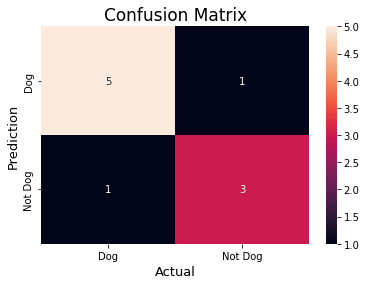

In [15]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])
 
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Finding precision and recall
accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy   :", accuracy)
precision = (cm[0,0])/(cm[0,0]+cm[0,1])
print("Precision :", precision)
recall = (cm[0,0])/(cm[0,0]+cm[1,0])
print("Recall    :", recall)
F1_score = 2*((precision*recall)/(precision+recall)) 
print("F1-score  :", F1_score)

Accuracy   : 0.8
Precision : 0.8333333333333334
Recall    : 0.8333333333333334
F1-score  : 0.8333333333333334
